In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:
import cv2 as cv

In [3]:
os.getcwd()

'/kaggle/working'

In [4]:
filepath='/kaggle/input/chest-xray-pneumonia'
os.listdir(filepath)

['chest_xray']

In [5]:
chest_xraypath=os.path.join(filepath,'chest_xray')

In [6]:
os.makedirs(chest_xraypath,exist_ok=True)

In [7]:
os.listdir(chest_xraypath)

['chest_xray', '__MACOSX', 'val', 'test', 'train']

In [8]:


Train_path= os.path.join(chest_xraypath,'train')
Test_path=os.path.join(chest_xraypath,'test')
Val_path=os.path.join(chest_xraypath,'val')


In [9]:
os.listdir(Train_path)

['PNEUMONIA', 'NORMAL']

In [10]:
X_train=[]
y_train=[]
X_val=[]
Y_val=[]

# **DATA LOADING AND RESIZING**

In [11]:
labels=['PNEUMONIA', 'NORMAL']
pneumonia_trainlist=os.listdir(os.path.join(Train_path,'PNEUMONIA'))
normal_trainlist=os.listdir(os.path.join(Train_path,'NORMAL'))
for label in labels:
    if label == 'PNEUMONIA':
        for img_path in  pneumonia_trainlist:
            img= cv.imread(os.path.join(Train_path,'PNEUMONIA',img_path),cv.IMREAD_GRAYSCALE)
            if img is None:
                continue  # skip unreadable files like .DS_Store
            img=cv.resize(img,(225,225),interpolation=cv.INTER_CUBIC)
            X_train.append(img)
            y_train.append(1)
    elif label == 'NORMAL':
        for img_path in  normal_trainlist:
            img= cv.imread(os.path.join(Train_path,'NORMAL',img_path),cv.IMREAD_GRAYSCALE)
            if img is None:
                continue  # skip unreadable files like .DS_Store
            img=cv.resize(img,(225,225),interpolation=cv.INTER_CUBIC)
            X_train.append(img)
            y_train.append(0)


In [12]:
X_test=[]
Y_test=[]
pneumonia_testlist=os.listdir(os.path.join(Test_path,'PNEUMONIA'))
normal_testlist=os.listdir(os.path.join(Test_path,'NORMAL'))
for label in labels:
    if label == 'PNEUMONIA':
        for img_path in  pneumonia_testlist:
            img= cv.imread(os.path.join(Test_path,'PNEUMONIA',img_path),cv.IMREAD_GRAYSCALE)
            if img is None:
                continue  # skip unreadable files like .DS_Store
            img=cv.resize(img,(225,225),interpolation=cv.INTER_CUBIC)
            X_test.append(img)
            Y_test.append(1)
    elif label == 'NORMAL':
        for img_path in  normal_testlist:
            img= cv.imread(os.path.join(Test_path,'NORMAL',img_path),cv.IMREAD_GRAYSCALE)
            if img is None:
                continue  # skip unreadable files like .DS_Store
            img=cv.resize(img,(225,225),interpolation=cv.INTER_CUBIC)
            X_test.append(img)
            Y_test.append(0)

In [13]:
pneumonia_Vallist=os.listdir(os.path.join(Val_path,'PNEUMONIA'))
normal_Vallist=os.listdir(os.path.join(Val_path,'NORMAL'))
for label in labels:
    if label == 'PNEUMONIA':
        for img_path in  pneumonia_Vallist:
            img= cv.imread(os.path.join(Val_path,'PNEUMONIA',img_path),cv.IMREAD_GRAYSCALE)
            if img is None:
                continue  # skip unreadable files like .DS_Store
            img=cv.resize(img,(225,225),interpolation=cv.INTER_CUBIC)
            X_val.append(img)
            Y_val.append(1)
    elif label == 'NORMAL':
        for img_path in  normal_Vallist:
            img= cv.imread(os.path.join(Val_path,'NORMAL',img_path),cv.IMREAD_GRAYSCALE)
            if img is None:
                continue  # skip unreadable files like .DS_Store
            img=cv.resize(img,(225,225),interpolation=cv.INTER_CUBIC)
            X_val.append(img)
            Y_val.append(0)

# **Data Augmentations**

In [14]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv.warpAffine(image, M, (w, h))
    return rotated

def random_crop(image, crop_height, crop_width):
    h, w = image.shape[:2]
    if h < crop_height or w < crop_width:
        raise ValueError("Crop dimensions exceed image size")
    y = np.random.randint(0, h - crop_height)
    x = np.random.randint(0, w - crop_width)
    image=image[y:y+crop_height, x:x+crop_width]
    image = cv.resize(image, (225, 225), interpolation=cv.INTER_CUBIC)
    return image

def gamma_correction(image, gamma):
    image = np.clip(image, 0, 255).astype(np.float32) / 255.0
    corrected = np.power(image, gamma)
    return np.uint8(np.clip(corrected * 255.0, 0, 255))

    
def Flip_function(img,flipCode):
    return cv.flip(img, flipCode)




In [15]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([1341, 3875]))

In [16]:
def random_augment(X_train, y_train, num_augmentations=100, seed=42):

    if seed is not None:
        np.random.seed(seed)

    y_train_new = np.array(y_train.copy())
    label_0_indices = np.where(y_train_new == 0)[0]

    
    # Define augmentation functions with their parameter ranges
    augmentations = {
        'rotate_image': {
            'func': lambda img: rotate_image(img, angle=np.random.uniform(-15, 15)),
        },
        'gamma_correction': {
            'func': lambda img: gamma_correction(img, gamma=np.random.uniform(0.5, 2.0)),
        },
       
        'Flip': {
            'func': lambda img: Flip_function(img, flipCode=np.random.choice([-1,1,0])),
        },
        'None':{
            'func': lambda img: img
        }
    }
    
    for _ in range(num_augmentations):
        # Randomly select an image and its label
        img_index = np.random.choice(label_0_indices)
        img = X_train[img_index].copy()
        label = y_train[img_index]
        
        # Randomly select an augmentation function
        aug_name = np.random.choice(list(augmentations.keys()))
        aug_func = augmentations[aug_name]['func']
        
        # Apply the augmentation
        augmented_img = aug_func(img)
        
        X_train.append(augmented_img)
        y_train.append(label)


random_augment(X_train, y_train,num_augmentations=1000,seed=42)

In [17]:
X_train=np.array(X_train)
print(X_train.shape)
y_train=np.array(y_train)
np.unique(y_train)
X_test=np.array(X_test)
print(X_test.shape)
X_val=np.array(X_val)
print(X_val.shape)
Y_test=np.array(Y_test)
Y_val=np.array(Y_val)

(6216, 225, 225)
(624, 225, 225)
(16, 225, 225)


In [18]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([2341, 3875]))

In [19]:
X_train = X_train.reshape(-1, 225, 225, 1)
X_val = X_val.reshape(-1, 225, 225, 1)
X_test= X_test.reshape(-1, 225, 225, 1)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test=X_test.astype('float32')

y_train = y_train.astype('float32')
Y_val = Y_val.astype('float32')
Y_test =Y_test.astype('float32')

In [20]:
print(X_train.shape)
print(X_val.shape)

(6216, 225, 225, 1)
(16, 225, 225, 1)


**DATA NORMALIZATION**

In [21]:
X_train= X_train /255.0

mean=np.mean(X_train,axis=(0,1,2))
std=np.std(X_train,axis=(0,1,2))
X_train= (X_train - mean)/std

In [22]:
X_test= X_test/255.0
X_test= (X_test - mean) / std

In [23]:
X_val=X_val/255.0
X_val=(X_val - mean) / std

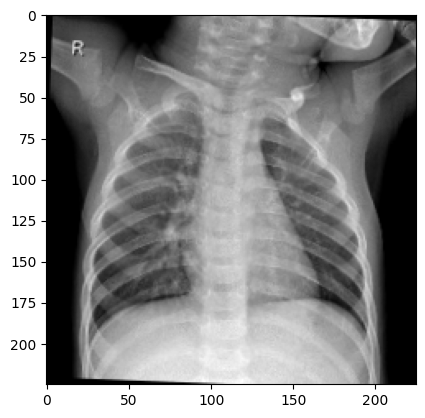

In [24]:
import matplotlib.pyplot as plt 
sample_image = X_train[6016]  
plt.imshow(sample_image,cmap='gray')

# **BASELINE CNN**

In [38]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

2025-05-28 23:22:09.133513: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748474529.316202      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748474529.366266      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [33]:
base_model=models.Sequential()
base_model.add(Input(shape=(225,225,1)))
base_model.add(Conv2D(16,(3,3),activation='relu'))
base_model.add(Conv2D(64,(3,3),activation='relu'))
base_model.add(MaxPooling2D(pool_size=(2,2)))
base_model.add(BatchNormalization())
base_model.add(Conv2D(128,(3,3),activation='relu',kernel_regularizer=regularizers.l2(0.001)))
base_model.add(Conv2D(128,(3,3),activation='relu',kernel_regularizer=regularizers.l2(0.001)))
base_model.add(BatchNormalization())
base_model.add(MaxPooling2D(pool_size=(2,2)))
base_model.add(Conv2D(128,(7,7),activation='relu',kernel_regularizer=regularizers.l2(0.001)))
base_model.add(Dropout(0.3))
base_model.add(Conv2D(128,(7,7),activation='relu',kernel_regularizer=regularizers.l2(0.001)))
base_model.add(Dropout(0.3))
base_model.add(BatchNormalization())
base_model.add(MaxPooling2D(pool_size=(2,2)))
base_model.add(Conv2D(256,(1,1),activation='tanh'))
base_model.add(Flatten())
base_model.add(BatchNormalization())
base_model.add(Dense(1026,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
base_model.add(Dropout(0.5))
base_model.add(Dense(1,activation='sigmoid'))

I0000 00:00:1746583170.071605      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746583170.072387      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [34]:
optimizer = Adam(learning_rate=0.01) 

base_model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [35]:
def scheduler(epoch, lr):
    if (epoch + 1) % 10 == 0: 
        return lr * 0.99       
    else:
        return lr  

In [36]:
lr_callback = LearningRateScheduler(scheduler)

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='best_model2.weights.h5',   
    monitor='val_loss',                 
    save_best_only=True,                
    save_weights_only=True,            
    verbose=1
)


In [38]:
history=base_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, Y_val),
    callbacks=[lr_callback,checkpoint]
)
history

Epoch 1/30


I0000 00:00:1746583235.121833     107 service.cc:148] XLA service 0x785d740074e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746583235.122898     107 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746583235.122925     107 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746583235.810086     107 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1746583259.626668     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.7583 - loss: 271.1827
Epoch 1: val_loss improved from inf to 183.20918, saving model to best_model2.weights.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 346ms/step - accuracy: 0.7586 - loss: 270.8575 - val_accuracy: 0.5000 - val_loss: 183.2092 - learning_rate: 0.0100
Epoch 2/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.8898 - loss: 19.6835
Epoch 2: val_loss improved from 183.20918 to 6.45398, saving model to best_model2.weights.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 57s 293ms/step - accuracy: 0.8897 - loss: 19.6487 - val_accuracy: 0.8125 - val_loss: 6.4540 - learning_rate: 0.0100
Epoch 3/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.8826 - loss: 6.0125
Epoch 3: val_loss did not improve from 6.45398
195/195 ━━━━━━━━━━━━━━━━━━━━ 52s 267ms/step - accuracy: 0.8827 - loss: 6.0104 - val_accuracy: 0.4375 - val_loss: 6.5638 - learning_rate: 0.0100
Epoch 4/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.8855 - los

In [39]:
base_model.load_weights('best_model2.weights.h5')

In [40]:
base_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 223, 223, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 221, 221, 64)        │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 110, 110, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 106, 106, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 47, 47, 128)         │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 47, 47, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 41, 41, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 41, 41, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 256)         │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 102400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 102400)              │         409,600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1026)                │     105,063,426 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1026)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 321,624,497 (1.20 GB)

 Trainable params: 107,139,685 (408.71 MB)

 Non-trainable params: 205,440 (802.50 KB)

 Optimizer params: 214,279,372 (817.41 MB)

In [41]:
loss, accuracy = base_model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9244 - loss: 0.6034
Test Loss: 0.9620936512947083
Test Accuracy: 0.8012820482254028


In [42]:
y_pred = base_model.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step


In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
y_pred_class = (y_pred > 0.6).astype("int32")

In [49]:
print(classification_report(Y_test, y_pred_class, target_names=['Normal','Pneonomina']))

              precision    recall  f1-score   support

      Normal       0.92      0.54      0.68       234
  Pneonomina       0.78      0.97      0.87       390

    accuracy                           0.81       624
   macro avg       0.85      0.76      0.77       624
weighted avg       0.83      0.81      0.80       624



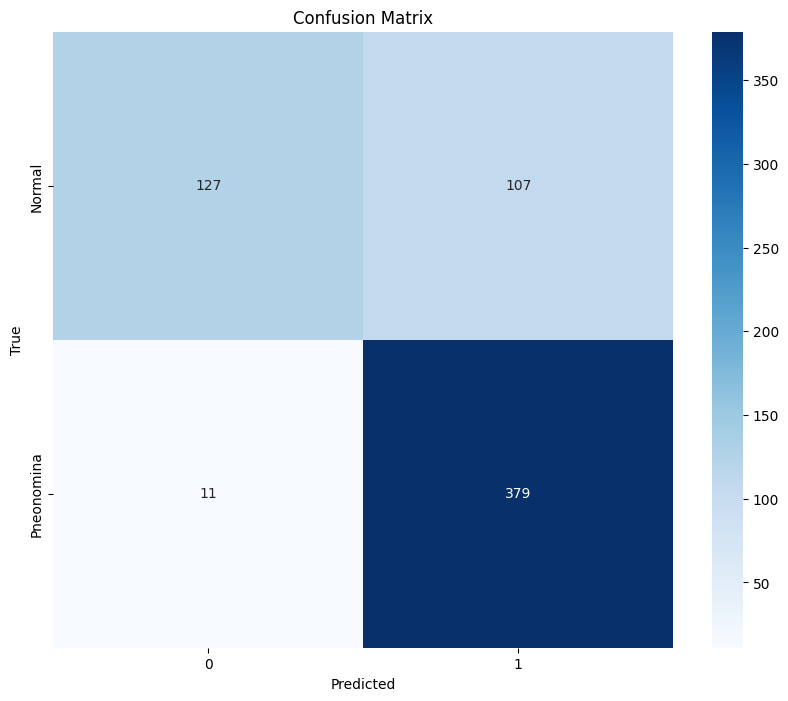

In [50]:
cm = confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', yticklabels=['Normal','Pneonomina'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Confusion Matrix**

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(Y_test, y_pred_class)
precision = precision_score(Y_test, y_pred_class)
recall = recall_score(Y_test, y_pred_class)
f1 = f1_score(Y_test, y_pred_class)
roc_auc = roc_auc_score(Y_test, y_pred)  # Uses probabilities, not classes

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")  
print(f"Recall (Sensitivity): {recall:.4f}")  
print(f"F1-Score: {f1:.4f}") 
print(f"ROC-AUC: {roc_auc:.4f}")  

Accuracy: 0.8109
Precision: 0.7798
Recall (Sensitivity): 0.9718
F1-Score: 0.8653
ROC-AUC: 0.9171


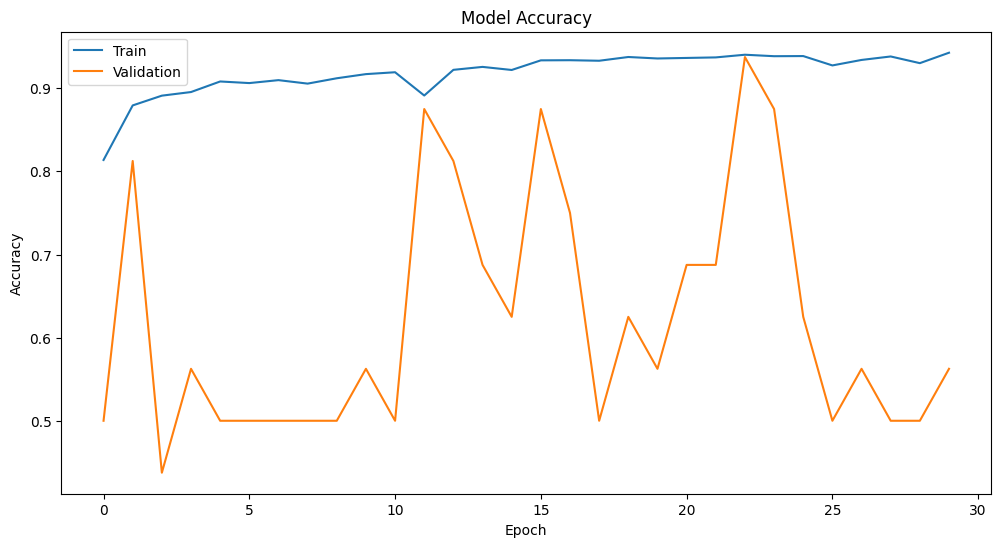

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

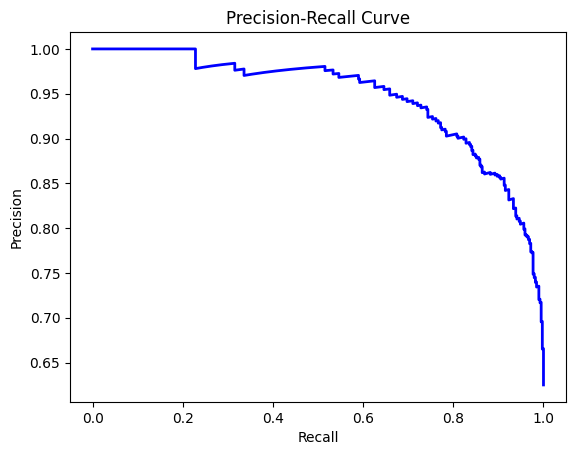

In [54]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

**Feature Map of the last layer**

In [55]:
from tensorflow.keras.models import Model

last_conv_layer_name = 'conv2d_6'  
submodel = Model(inputs=base_model.inputs, outputs=base_model.get_layer(last_conv_layer_name).output)

In [56]:
sample_image = X_train[0]  
sample_image = np.expand_dims(sample_image, axis=0)

# Get feature maps
feature_maps = submodel.predict(sample_image) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


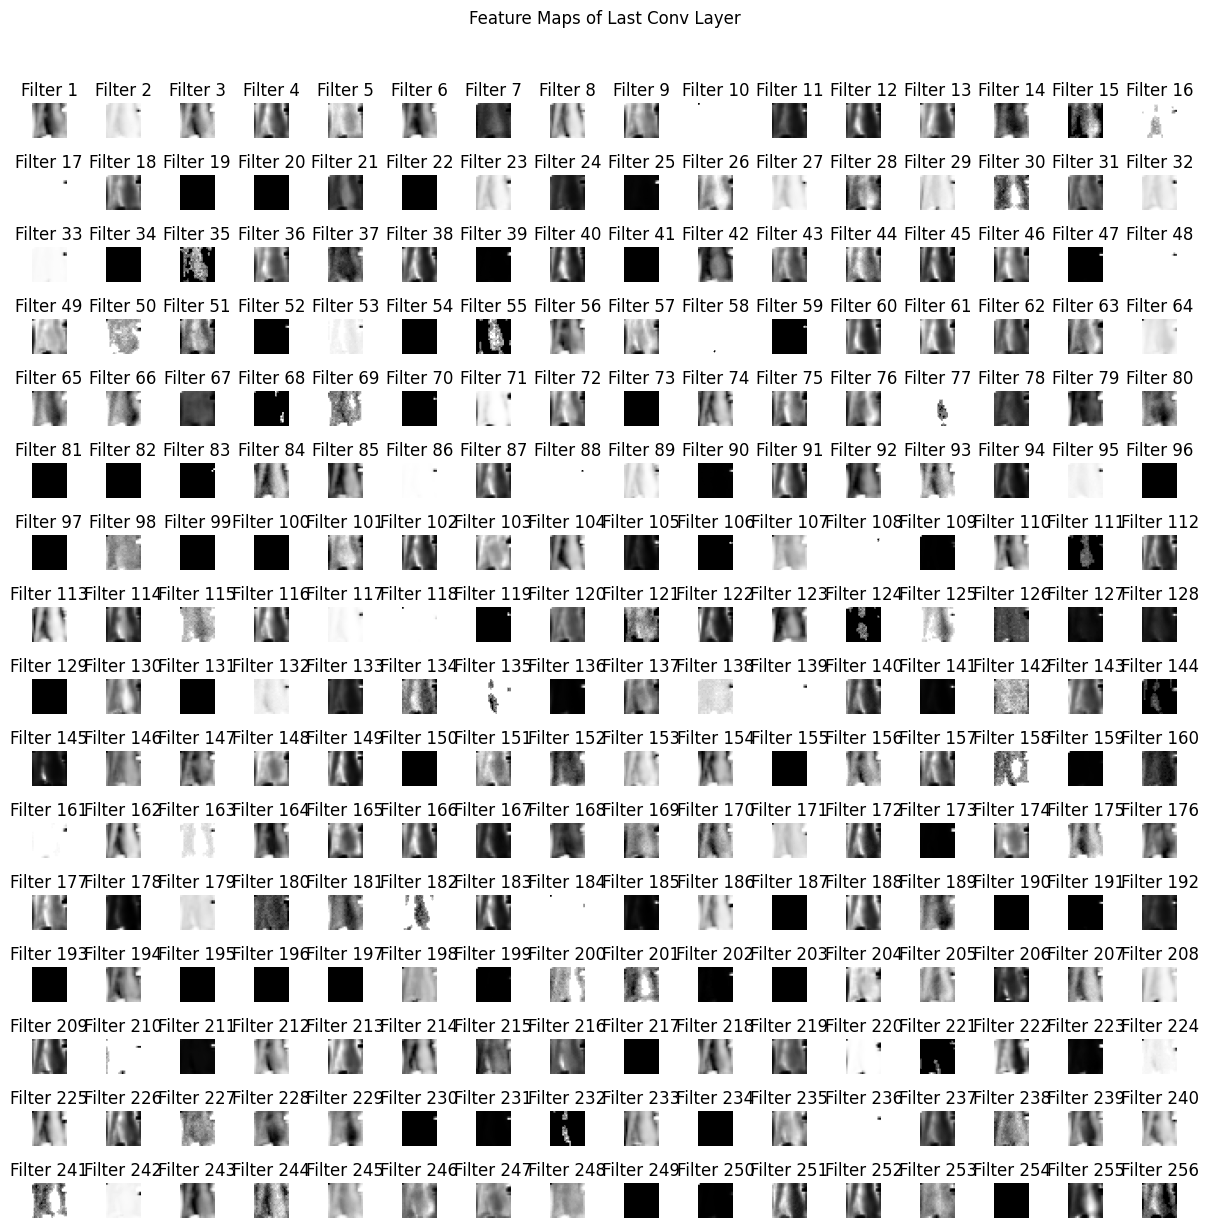

In [57]:
# Squeeze batch dimension
feature_maps = feature_maps[0]  
num_filters = feature_maps.shape[-1]

# Plot settings
rows = int(np.ceil(np.sqrt(num_filters)))
cols = int(np.ceil(num_filters / rows))

plt.figure(figsize=(12, 12))
for i in range(num_filters):
    plt.subplot(rows, cols, i+1)
    plt.imshow(feature_maps[:, :, i], cmap='gray') 
    plt.axis('off')
    plt.title(f'Filter {i+1}')

plt.suptitle('Feature Maps of Last Conv Layer', y=1.02)
plt.tight_layout()
plt.show()

# **VGG16**

In [31]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

vgg16_model = VGG16(weights='imagenet', 
                   include_top=False,  
                   input_shape=(225, 225, 3))


for layer in vgg16_model.layers:
    layer.trainable = False

for layer in vgg16_model.layers[-8:]:
    layer.trainable = True
    
x = GlobalAveragePooling2D()(vgg16_model.output)
x = Dropout(0.5)(x)  
predictions = Dense(1, activation='sigmoid')(x)

# 4. Create the final model
model = Model(inputs=vgg16_model.input, outputs=predictions)

# 5. Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',  
              metrics=['accuracy'])

model.summary()

2025-05-31 02:49:47.560626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748659787.797518      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748659787.864572      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1748659801.038773      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748659801.039361      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability:

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 225, 225, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 225, 225, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 225, 225, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │              

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 12,979,713 (49.51 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

In [25]:
import tensorflow as tf
def preprocess_tf(x, y):
    #print(x.shape)
    x = tf.cond(
        tf.equal(tf.shape(x)[-1], 1),
        lambda: tf.image.grayscale_to_rgb(x),
        lambda: x
    )
    return x, y

def create_dataset(X, y, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset=dataset.shuffle(1000)
    dataset = dataset.map(preprocess_tf)
    return dataset.batch(batch_size).repeat().prefetch(tf.data.AUTOTUNE)
    
def create_validationData(X,Y,batch_size=8):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset=dataset.shuffle(16)
    dataset = dataset.map(preprocess_tf)
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE) 
    
    


2025-06-03 01:25:31.097105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748913931.327250      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748913931.396377      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [26]:
new_train_data = create_dataset(X_train,y_train )
new_val_data = create_validationData(X_val, Y_val,batch_size=8)

I0000 00:00:1748913953.957047      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748913953.957633      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [28]:
len(X_train)

6216

Epoch 1/20


I0000 00:00:1748660002.453696     103 service.cc:148] XLA service 0x7fb5a8005090 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748660002.454838     103 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748660002.454861     103 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748660002.961452     103 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1748660018.368731     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


194/194 ━━━━━━━━━━━━━━━━━━━━ 70s 254ms/step - accuracy: 0.9370 - loss: 0.1624 - val_accuracy: 0.5625 - val_loss: 0.6585
Epoch 2/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 50s 238ms/step - accuracy: 0.9400 - loss: 0.1889 - val_accuracy: 0.9375 - val_loss: 0.1984
Epoch 3/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 47s 243ms/step - accuracy: 0.9773 - loss: 0.0747 - val_accuracy: 1.0000 - val_loss: 0.1010
Epoch 4/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 48s 247ms/step - accuracy: 0.9752 - loss: 0.0749 - val_accuracy: 1.0000 - val_loss: 0.1120
Epoch 5/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 49s 252ms/step - accuracy: 0.9723 - loss: 0.0854 - val_accuracy: 1.0000 - val_loss: 0.0614
Epoch 6/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 49s 254ms/step - accuracy: 0.9880 - loss: 0.0439 - val_accuracy: 0.9375 - val_loss: 0.1332
Epoch 7/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 49s 254ms/step - accuracy: 0.9690 - loss: 0.0883 - val_accuracy: 1.0000 - val_loss: 0.1057
Epoch 8/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 49s 253ms/step - accuracy: 0.9847 - loss: 0.0611 - val

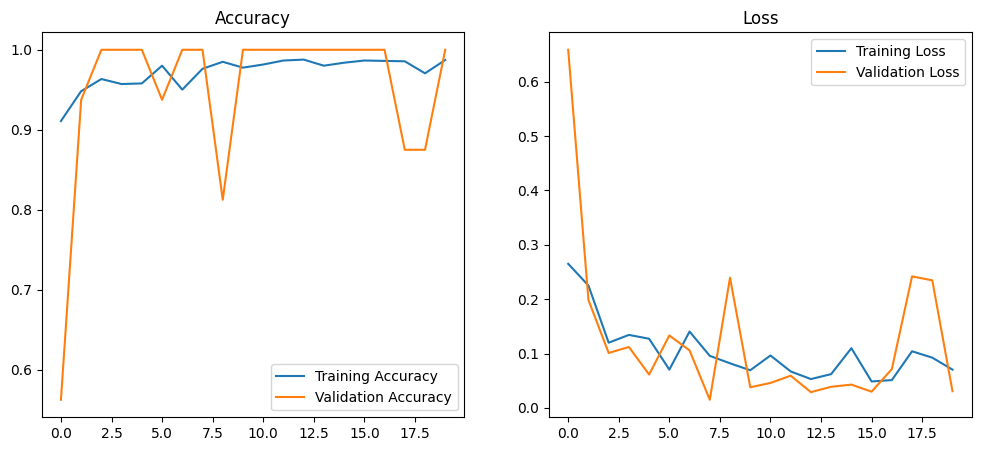

In [36]:
history = model.fit(
    new_train_data,
    epochs=20,
    validation_data=new_val_data,
    steps_per_epoch=int(len(X_train)/32)
    )

# 8. Save the model
model.save('vgg16_transfer_learning.h5')

# 9. Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import classification_report

In [59]:
X_test.shape

(624, 225, 225, 1)

In [60]:
from sklearn.metrics import accuracy_score
X_test=tf.cast(X_test,tf.float32)
X_test=tf.image.grayscale_to_rgb(X_test)
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")


accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 455ms/step
Test Accuracy: 0.8782


In [64]:
print(classification_report(Y_test,y_pred, target_names=['Normal','Pneonomina']))

              precision    recall  f1-score   support

      Normal       0.92      0.74      0.82       234
  Pneonomina       0.86      0.96      0.91       390

    accuracy                           0.88       624
   macro avg       0.89      0.85      0.86       624
weighted avg       0.88      0.88      0.88       624



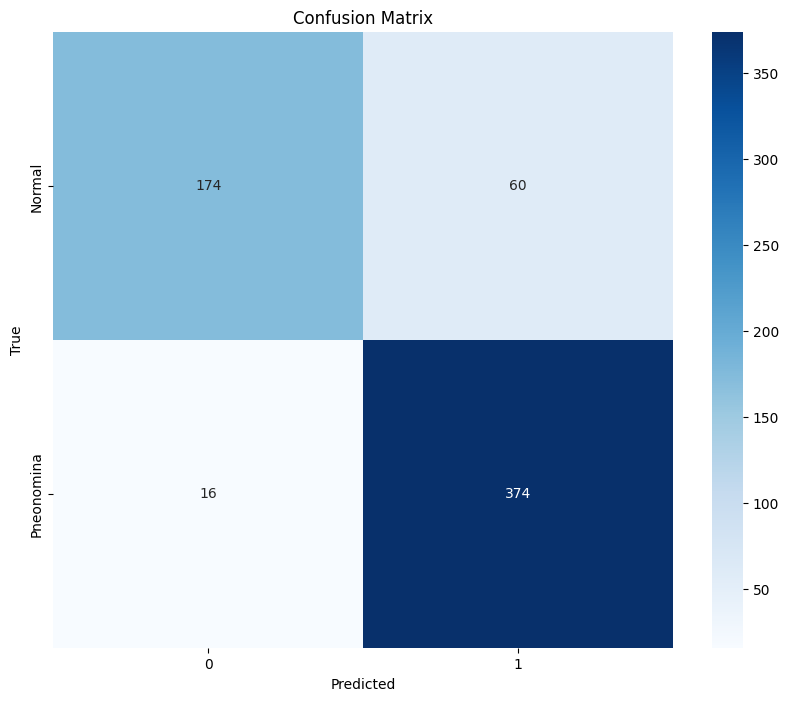

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', yticklabels=['Normal','Pneonomina'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_probs)  

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")  
print(f"Recall (Sensitivity): {recall:.4f}")  
print(f"F1-Score: {f1:.4f}") 
print(f"ROC-AUC: {roc_auc:.4f}")  

Accuracy: 0.8782
Precision: 0.8618
Recall (Sensitivity): 0.9590
F1-Score: 0.9078
ROC-AUC: 0.9325


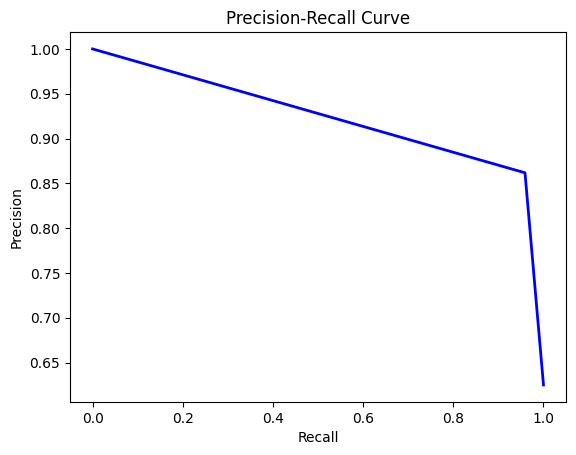

In [73]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# **Training RESTNET 50 Model**

In [29]:
from tensorflow.keras.applications import ResNet50
restnet_model = ResNet50(
    weights='imagenet',       
    include_top=False,        
    input_shape=(225, 225, 3) 
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
for layer in restnet_model.layers:
    layer.trainable = False

for layer in restnet_model.layers[-20:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True
    
x = GlobalAveragePooling2D()(restnet_model.output)
x = Dropout(0.5)(x)  
predictions = Dense(1, activation='sigmoid')(x)


restnet_Model = Model(inputs=restnet_model.input, outputs=predictions)


restnet_Model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',  
              metrics=['accuracy'])

restnet_Model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 225, 225, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 231, 231, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 113, 113, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 113, 113, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 113, 113, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 115, 115, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 57, 57, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 57, 57, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 57, 57, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 57, 57, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 57, 57, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 57, 57, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 57, 57, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 57, 57, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 57, 57, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 8,921,089 (34.03 MB)

 Non-trainable params: 14,668,672 (55.96 MB)

In [ ]:
history = restnet_Model.fit(
    new_train_data,
    epochs=20,
    validation_data=new_val_data,
    steps_per_epoch=int(len(X_train)/32)
    )

# 8. Save the model
restnet_model.save('restnet_transfer_learning.h5')

# 9. Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

Epoch 1/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 25s 130ms/step - accuracy: 0.9633 - loss: 0.1008 - val_accuracy: 0.9375 - val_loss: 0.1587
Epoch 2/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 25s 128ms/step - accuracy: 0.9774 - loss: 0.1002 - val_accuracy: 1.0000 - val_loss: 0.0360
Epoch 3/20
 11/194 ━━━━━━━━━━━━━━━━━━━━ 21s 116ms/step - accuracy: 0.9373 - loss: 0.1881

In [34]:
X_test.shape

(624, 225, 225, 1)

In [35]:
from sklearn.metrics import accuracy_score
X_test=tf.cast(X_test,tf.float32)
X_test=tf.image.grayscale_to_rgb(X_test)
y_pred_probs = restnet_Model.predict(X_test)
y_pred_rest = (y_pred_probs > 0.5).astype("int32")


accuracy = accuracy_score(Y_test, y_pred_rest)
print(f"Test Accuracy: {accuracy:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 376ms/step
Test Accuracy: 0.8734


In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_rest, target_names=['Normal','Pneonomina']))

              precision    recall  f1-score   support

      Normal       0.89      0.76      0.82       234
  Pneonomina       0.87      0.94      0.90       390

    accuracy                           0.87       624
   macro avg       0.88      0.85      0.86       624
weighted avg       0.87      0.87      0.87       624



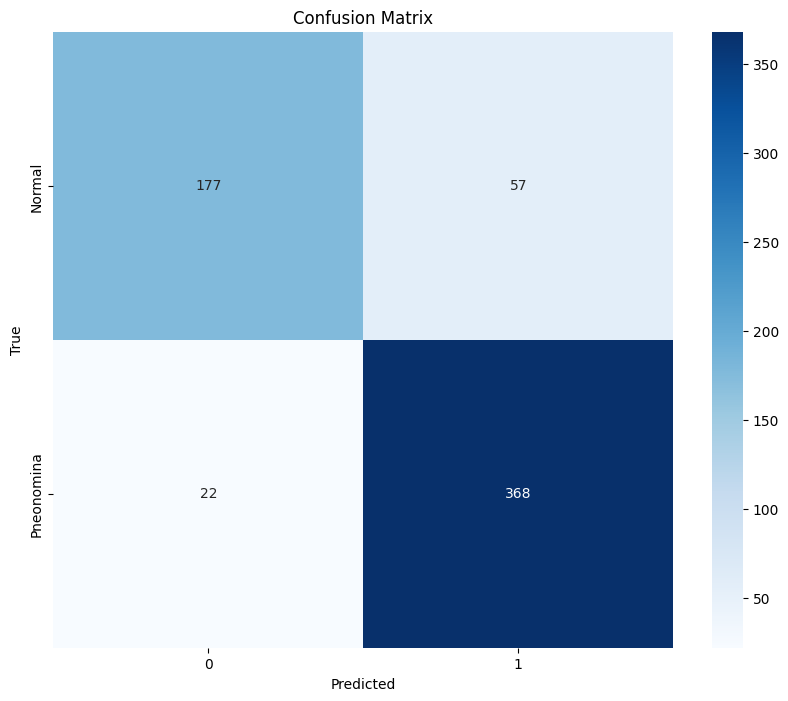

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test,y_pred_rest)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', yticklabels=['Normal','Pneonomina'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(Y_test, y_pred_rest)
precision = precision_score(Y_test, y_pred_rest)
recall = recall_score(Y_test, y_pred_rest)
f1 = f1_score(Y_test, y_pred_rest)
roc_auc = roc_auc_score(Y_test, y_pred_probs)  

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")  
print(f"Recall (Sensitivity): {recall:.4f}")  
print(f"F1-Score: {f1:.4f}") 
print(f"ROC-AUC: {roc_auc:.4f}")  

Accuracy: 0.8734
Precision: 0.8659
Recall (Sensitivity): 0.9436
F1-Score: 0.9031
ROC-AUC: 0.9220


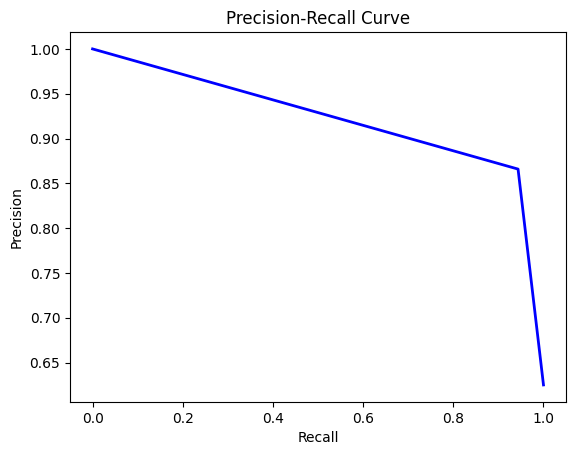

In [41]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_rest)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()